## Essential Imports

In [1]:
import pydicom
import pylab
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

import warnings
warnings.filterwarnings("ignore")

## Exploratory Data Analysis

In [2]:
## Reading the train data
train_data = pd.read_csv('stage_2_train_labels.csv')
train_data.shape

(30227, 6)

In [3]:
## Preview of the top 20 rows of train_data
train_data.head(20)

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1
5,00436515-870c-4b36-a041-de91049b9ab4,562.0,152.0,256.0,453.0,1
6,00569f44-917d-4c86-a842-81832af98c30,NaN,NaN,NaN,NaN,0
7,006cec2e-6ce2-4549-bffa-eadfcd1e9970,NaN,NaN,NaN,NaN,0
8,00704310-78a8-4b38-8475-49f4573b2dbb,323.0,577.0,160.0,104.0,1
9,00704310-78a8-4b38-8475-49f4573b2dbb,695.0,575.0,162.0,137.0,1


### The patients that have pneumonia have the x,y, width and height values populated, target being 1.
### The patients that do not have pneumonia have the x,y, width and height values populated as NaN, target being 0.

In [4]:
## Checking for the presence of duplicates in the train_data

print("Shape of the train_data dataframe before dropping the duplicates is:",train_data.shape)
print("Shape of the train_data dataframe after dropping the duplicates is:",train_data.drop_duplicates().shape)

Shape of the train_data dataframe before dropping the duplicates is: (30227, 6)
Shape of the train_data dataframe after dropping the duplicates is: (30227, 6)


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30227 entries, 0 to 30226
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   patientId  30227 non-null  object 
 1   x          9555 non-null   float64
 2   y          9555 non-null   float64
 3   width      9555 non-null   float64
 4   height     9555 non-null   float64
 5   Target     30227 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 1.4+ MB


In [6]:
## Get the unique count of all column values
train_data.nunique()

patientId    26684
x              748
y              726
width          351
height         725
Target           2
dtype: int64

In [7]:
## Getting the count of number of nulls present in the train_data dataframe
train_data.isnull().sum()

patientId        0
x            20672
y            20672
width        20672
height       20672
Target           0
dtype: int64

In [8]:
## 5-point summary
train_data.describe().T 

,count,mean,std,min,25%,50%,75%,max
x,9555.0,394.047724,204.574172,2.0,207.0,324.0,594.0,835.0
y,9555.0,366.839560,148.940488,2.0,249.0,365.0,478.5,881.0
width,9555.0,218.471376,59.289475,40.0,177.0,217.0,259.0,528.0
height,9555.0,329.269702,157.750755,45.0,203.0,298.0,438.0,942.0
Target,30227.0,0.316108,0.464963,0.0,0.0,0.0,1.0,1.0


Text(0.5, 1.0, 'Pneumonia vs No Pneumonia')

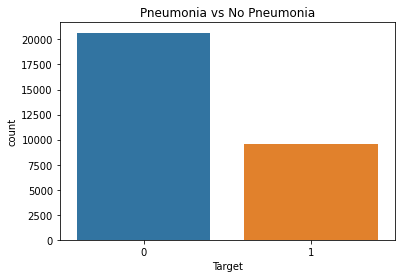

In [9]:
sns.countplot(x="Target", data=train_data)
plt.title("Pneumonia vs No Pneumonia")

In [10]:
train_data['Target'].value_counts()

0    20672
1     9555
Name: Target, dtype: int64

In [11]:
print("The number of patients having pneumonia is:",train_data['Target'].value_counts()[1])
print("The number of patients not having pneumonia is:",train_data['Target'].value_counts()[0])

The number of patients having pneumonia is: 9555
The number of patients not having pneumonia is: 20672


In [12]:
print("The actual number of patients is:",len(train_data.patientId.unique()))

The actual number of patients is: 26684


In [13]:
# calculating aspect_ratio & area using the bounding box co-ordinates
train_data['aspect_ratio'] = (train_data['width']/train_data['height'])
train_data['area'] = train_data['width'] * train_data['height']

In [14]:
train_data.head(20)

,patientId,x,y,width,height,Target,aspect_ratio,area
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,NaN,NaN
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,NaN,NaN
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,NaN,NaN
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,NaN,NaN
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,0.562005,80727.0
5,00436515-870c-4b36-a041-de91049b9ab4,562.0,152.0,256.0,453.0,1,0.565121,115968.0
6,00569f44-917d-4c86-a842-81832af98c30,NaN,NaN,NaN,NaN,0,NaN,NaN
7,006cec2e-6ce2-4549-bffa-eadfcd1e9970,NaN,NaN,NaN,NaN,0,NaN,NaN
8,00704310-78a8-4b38-8475-49f4573b2dbb,323.0,577.0,160.0,104.0,1,1.538462,16640.0
9,00704310-78a8-4b38-8475-49f4573b2dbb,695.0,575.0,162.0,137.0,1,1.182482,22194.0


In [15]:
## Preview of a sample dicom file
patientId = train_data['patientId'][13]
dcm_file = 'stage_2_train_images/%s.dcm' % patientId
dcm_data = pydicom.read_file(dcm_file)

print(dcm_data)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 202
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.18264.1517874409.541909
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.18264.1517874409.541909
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time      

(-0.5, 1023.5, 1023.5, -0.5)

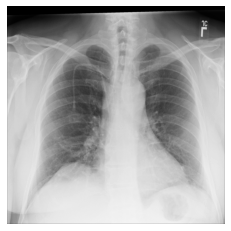

In [16]:
# reading image array from DICOM file and plotting a sample image
im = dcm_data.pixel_array
pylab.imshow(im, cmap=pylab.cm.gist_gray)
pylab.axis('off')

In [18]:
def draw(data,patient_id):
    """
    Method to draw single patient with bounding box(es) if present 

    """
    # --- Open DICOM file
    d = pydicom.read_file(data[patient_id]['dicom'])
    im = d.pixel_array

    # --- Convert from single-channel grayscale to 3-channel RGB
    im = np.stack([im] * 3, axis=2)

    # --- Add boxes with random color if present
    for box in data[patient_id]['boxes']:
        if box != []:
            rgb = np.floor(np.random.rand(3) * 256).astype('int')
            im = overlay_box(im=im, box=box, rgb=rgb, stroke=6)

    pylab.imshow(im, cmap=pylab.cm.gist_gray)
    pylab.axis('off')

def overlay_box(im, box, rgb, stroke=1):
    """
    Method to overlay single box on image

    """
    # --- Convert coordinates to integers
    box = [int(b) for b in box]
    
    # --- Extract coordinates
    y1, x1, height, width = box
    y2 = y1 + height
    x2 = x1 + width

    im[y1:y1 + stroke, x1:x2] = rgb
    im[y2:y2 + stroke, x1:x2] = rgb
    im[y1:y2, x1:x1 + stroke] = rgb
    im[y1:y2, x2:x2 + stroke] = rgb

    return im

def parse_data(df):
    """
    Method to read a CSV file (Pandas dataframe) and parse the 
    data into the following nested dictionary:

      parsed = {
        
        'patientId-00': {
            'dicom': path/to/dicom/file,
            'label': either 0 or 1 for normal or pnuemonia, 
            'boxes': list of box(es)
        },
        'patientId-01': {
            'dicom': path/to/dicom/file,
            'label': either 0 or 1 for normal or pnuemonia, 
            'boxes': list of box(es)
        }, ...

      }

    """
    # --- Define lambda to extract coords in list [y, x, height, width]
    extract_box = lambda row: [row['y'], row['x'], row['height'], row['width']]

    parsed = {}
    for n, row in df.iterrows():
        # --- Initialize patient entry into parsed 
        pid = row['patientId']
        if pid not in parsed:
            parsed[pid] = {
                'dicom': 'stage_2_train_images/%s.dcm' % pid,
                'label': row['Target'],
                'boxes': []}

        # --- Add box if opacity is present
        if parsed[pid]['label'] == 1:
            parsed[pid]['boxes'].append(extract_box(row))

    return parsed

parsed = parse_data(train_data)
print(parsed['00aecb01-a116-45a2-956c-08d2fa55433f'])

{'dicom': 'stage_2_train_images/00aecb01-a116-45a2-956c-08d2fa55433f.dcm', 'label': 1, 'boxes': [[322.0, 288.0, 135.0, 94.0], [299.0, 547.0, 165.0, 119.0]]}


In [17]:
## Getting the patientId based on the number of bounding boxes aligned to that patientId
def get_id(data,bbox=1):
    keys = data.keys()
    for i in keys:
        if len(data[i]['boxes']) == bbox:
            return i

In [19]:
parsed

{'0004cfab-14fd-4e49-80ba-63a80b6bddd6': {'dicom': 'stage_2_train_images/0004cfab-14fd-4e49-80ba-63a80b6bddd6.dcm',
  'label': 0,
  'boxes': []},
 '00313ee0-9eaa-42f4-b0ab-c148ed3241cd': {'dicom': 'stage_2_train_images/00313ee0-9eaa-42f4-b0ab-c148ed3241cd.dcm',
  'label': 0,
  'boxes': []},
 '00322d4d-1c29-4943-afc9-b6754be640eb': {'dicom': 'stage_2_train_images/00322d4d-1c29-4943-afc9-b6754be640eb.dcm',
  'label': 0,
  'boxes': []},
 '003d8fa0-6bf1-40ed-b54c-ac657f8495c5': {'dicom': 'stage_2_train_images/003d8fa0-6bf1-40ed-b54c-ac657f8495c5.dcm',
  'label': 0,
  'boxes': []},
 '00436515-870c-4b36-a041-de91049b9ab4': {'dicom': 'stage_2_train_images/00436515-870c-4b36-a041-de91049b9ab4.dcm',
  'label': 1,
  'boxes': [[152.0, 264.0, 379.0, 213.0], [152.0, 562.0, 453.0, 256.0]]},
 '00569f44-917d-4c86-a842-81832af98c30': {'dicom': 'stage_2_train_images/00569f44-917d-4c86-a842-81832af98c30.dcm',
  'label': 0,
  'boxes': []},
 '006cec2e-6ce2-4549-bffa-eadfcd1e9970': {'dicom': 'stage_2_train_

In [20]:
print(len(parsed))

26684


In [21]:
parsed[get_id(parsed,bbox=1)]

{'dicom': 'stage_2_train_images/0100515c-5204-4f31-98e0-f35e4b00004a.dcm',
 'label': 1,
 'boxes': [[416.0, 703.0, 77.0, 84.0]]}

In [22]:
parsed[get_id(parsed,bbox=2)]

{'dicom': 'stage_2_train_images/00436515-870c-4b36-a041-de91049b9ab4.dcm',
 'label': 1,
 'boxes': [[152.0, 264.0, 379.0, 213.0], [152.0, 562.0, 453.0, 256.0]]}

In [23]:
parsed[get_id(parsed,bbox=3)]

{'dicom': 'stage_2_train_images/03a9498c-549d-4e7d-800b-e74797f7f625.dcm',
 'label': 1,
 'boxes': [[511.0, 195.0, 271.0, 218.0],
  [214.0, 612.0, 89.0, 109.0],
  [599.0, 610.0, 245.0, 265.0]]}

In [24]:
parsed[get_id(parsed,bbox=4)]

{'dicom': 'stage_2_train_images/0ab261f9-4eb5-42ab-a9a5-e918904d6356.dcm',
 'label': 1,
 'boxes': [[352.0, 613.0, 102.0, 106.0],
  [644.0, 266.0, 146.0, 135.0],
  [452.0, 545.0, 125.0, 215.0],
  [558.0, 722.0, 88.0, 88.0]]}

Patient ID: 0100515c-5204-4f31-98e0-f35e4b00004a


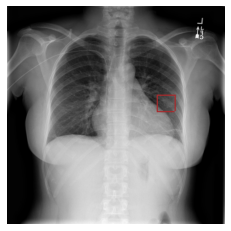

In [25]:
id_ = get_id(parsed,bbox=1)
print('Patient ID:',id_)
draw(parsed,id_)

Patient ID: 00436515-870c-4b36-a041-de91049b9ab4


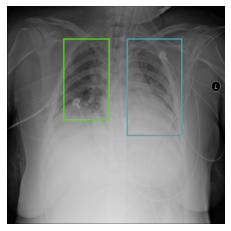

In [26]:
id_ = get_id(parsed,bbox=2)
print('Patient ID:',id_)
draw(parsed,id_)

Patient ID: 03a9498c-549d-4e7d-800b-e74797f7f625


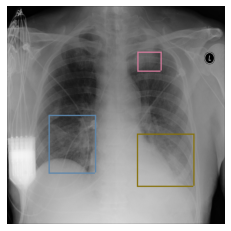

In [27]:
id_ = get_id(parsed,bbox=3)
print('Patient ID:',id_)
draw(parsed,id_)

Patient ID: 0ab261f9-4eb5-42ab-a9a5-e918904d6356


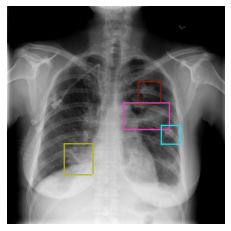

In [28]:
id_ = get_id(parsed,bbox=4)
print('Patient ID:',id_)
draw(parsed,id_)

## Observation:-

### The minimum number of opacities is 1.
### the maximum number of opacities is 4.

In [29]:
# function to get info from dicom file
def get_dicom_info(patientId, root_dir='stage_2_train_images/'):
    fn = os.path.join(root_dir, f'{patientId}.dcm')
    dcm_data = pydicom.read_file(fn)
    return {'age': dcm_data.PatientAge, 
            'gender': dcm_data.PatientSex, 
            'id': os.path.basename(fn).split('.')[0]}

In [30]:
# getting age,gender related information from dicom file
patient_ids = list(train_data.patientId.unique())
dicom_info=[]
for i in patient_ids:
    dicom_info.append(get_dicom_info(i))

dicom_info = pd.DataFrame(dicom_info)
dicom_info['gender'] = dicom_info['gender'].astype('category')
dicom_info['age'] = dicom_info['age'].astype(int)

dicom_info.head(10)

,age,gender,id
0,51,F,0004cfab-14fd-4e49-80ba-63a80b6bddd6
1,48,F,00313ee0-9eaa-42f4-b0ab-c148ed3241cd
2,19,M,00322d4d-1c29-4943-afc9-b6754be640eb
3,28,M,003d8fa0-6bf1-40ed-b54c-ac657f8495c5
4,32,F,00436515-870c-4b36-a041-de91049b9ab4
5,54,M,00569f44-917d-4c86-a842-81832af98c30
6,78,M,006cec2e-6ce2-4549-bffa-eadfcd1e9970
7,75,M,00704310-78a8-4b38-8475-49f4573b2dbb
8,59,F,008c19e8-a820-403a-930a-bc74a4053664
9,63,M,009482dc-3db5-48d4-8580-5c89c4f01334


In [31]:
# merging label info with dicom info
train_data = (train_data.merge(dicom_info, left_on='patientId', right_on='id', how='left').drop(columns='id'))
train_data.head(10)

,patientId,x,y,width,height,Target,aspect_ratio,area,age,gender
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,NaN,NaN,51,F
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,NaN,NaN,48,F
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,NaN,NaN,19,M
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,NaN,NaN,28,M
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,0.562005,80727.0,32,F
5,00436515-870c-4b36-a041-de91049b9ab4,562.0,152.0,256.0,453.0,1,0.565121,115968.0,32,F
6,00569f44-917d-4c86-a842-81832af98c30,NaN,NaN,NaN,NaN,0,NaN,NaN,54,M
7,006cec2e-6ce2-4549-bffa-eadfcd1e9970,NaN,NaN,NaN,NaN,0,NaN,NaN,78,M
8,00704310-78a8-4b38-8475-49f4573b2dbb,323.0,577.0,160.0,104.0,1,1.538462,16640.0,75,M
9,00704310-78a8-4b38-8475-49f4573b2dbb,695.0,575.0,162.0,137.0,1,1.182482,22194.0,75,M


In [32]:
# saving the train_data
train_data.to_csv('train_data.csv',index=False)

# reading the train_data
train_data= pd.read_csv('train_data.csv')

In [32]:
class_info = pd.read_csv('stage_2_detailed_class_info.csv')
class_info.head(20)

,patientId,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity
5,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity
6,00569f44-917d-4c86-a842-81832af98c30,No Lung Opacity / Not Normal
7,006cec2e-6ce2-4549-bffa-eadfcd1e9970,No Lung Opacity / Not Normal
8,00704310-78a8-4b38-8475-49f4573b2dbb,Lung Opacity
9,00704310-78a8-4b38-8475-49f4573b2dbb,Lung Opacity


In [33]:
class_info.shape

(30227, 2)

Text(0.5, 1.0, 'Pneumonia Class Types')

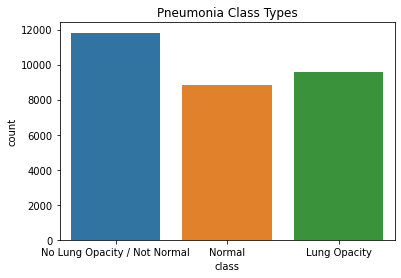

In [34]:
sns.countplot(x="class", data=class_info)
plt.title("Pneumonia Class Types")

In [35]:
class_info['class'].value_counts()

No Lung Opacity / Not Normal    11821
Lung Opacity                     9555
Normal                           8851
Name: class, dtype: int64

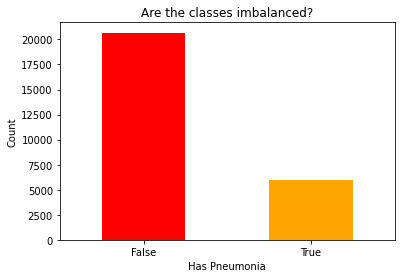

In [36]:
boxes_per_patient = train_data.groupby('patientId')['Target'].sum()
ax = (boxes_per_patient > 0).value_counts().plot.bar(color= ['red','orange'])
ax.set_title('Are the classes imbalanced?')
ax.set_xlabel('Has Pneumonia')
ax.set_ylabel('Count')
ax.xaxis.set_tick_params(rotation=0)
plt.show()

From the plot,it is clear that the data is highly imbalanced.
There is almost 5000 positive & 20000 negative points.
The imbalance ratio is almost 4:1 (negative:positive)
The reason behind the imbalance is that there are almost 11000 datapoints which are classified as No Lung Opacity / Not Normal, but those points are also considered as negative.

### Observing the distributions of continuous variables x,y,w and h

In [38]:
train_data= pd.read_csv('train_data.csv')

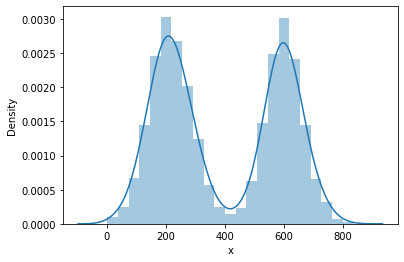

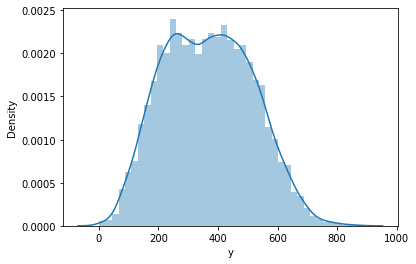

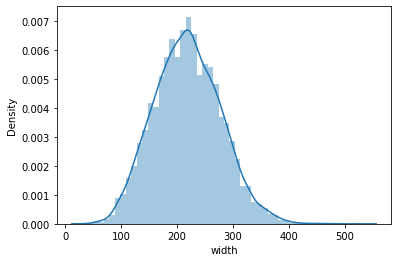

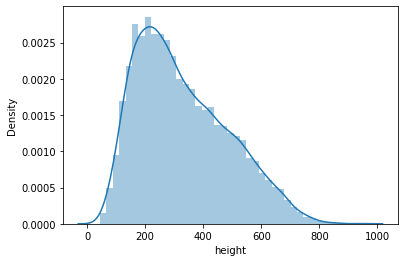

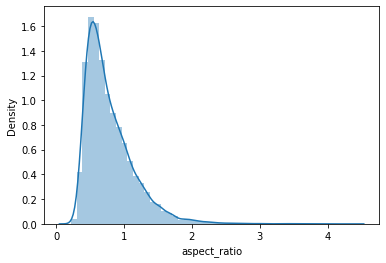

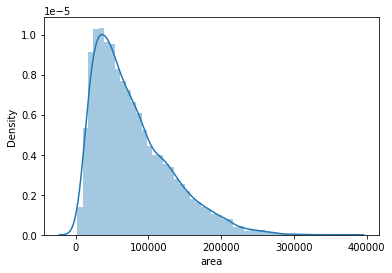

In [39]:
c_cols = ['x','y','width','height','aspect_ratio','area']
for column in c_cols :
    plt.close()
    sns.distplot(train_data[train_data['Target']==1][column])
    plt.show()

### Checking for outliers in 'x','y','width','height','aspect_ratio','area'

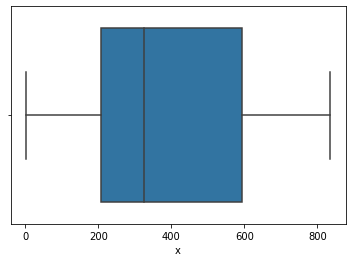

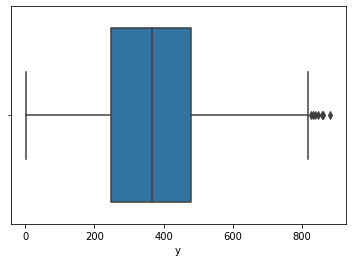

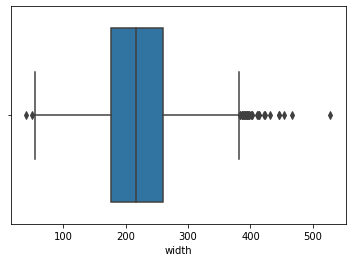

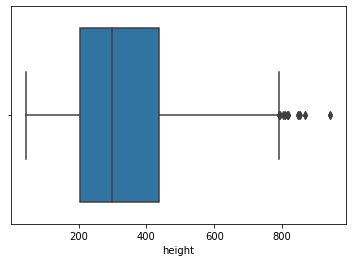

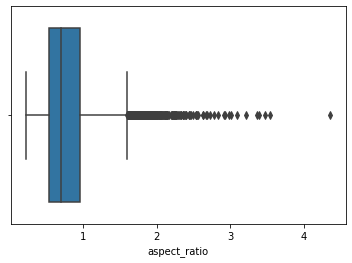

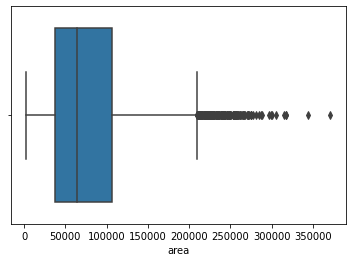

In [40]:
c_cols = ['x','y','width','height','aspect_ratio','area']
for column in c_cols :
    plt.close()
    sns.boxplot(train_data[train_data['Target']==1][column])
    plt.show()

### Observing the distribution of continuous variable age

<AxesSubplot:xlabel='age', ylabel='Density'>

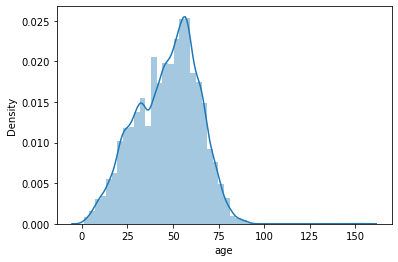

In [41]:
sns.distplot(train_data['age'])

### Checking for presence of outliers in age

<AxesSubplot:xlabel='age'>

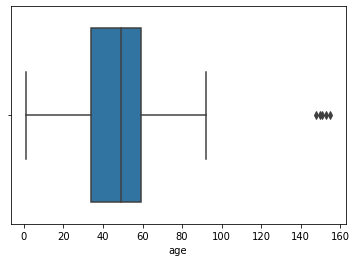

In [42]:
sns.boxplot(train_data['age'])

In [45]:
# getting centres of bounding boxes
centers = (train_data.dropna(subset=['x'])
           .assign(center_x=train_data.x + train_data.width / 2, center_y=train_data.y + train_data.height / 2))

In [46]:
centers.head()

,patientId,x,y,width,height,Target,aspect_ratio,area,age,gender,center_x,center_y
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,0.562005,80727.0,32,F,370.5,341.5
5,00436515-870c-4b36-a041-de91049b9ab4,562.0,152.0,256.0,453.0,1,0.565121,115968.0,32,F,690.0,378.5
8,00704310-78a8-4b38-8475-49f4573b2dbb,323.0,577.0,160.0,104.0,1,1.538462,16640.0,75,M,403.0,629.0
9,00704310-78a8-4b38-8475-49f4573b2dbb,695.0,575.0,162.0,137.0,1,1.182482,22194.0,75,M,776.0,643.5
14,00aecb01-a116-45a2-956c-08d2fa55433f,288.0,322.0,94.0,135.0,1,0.696296,12690.0,6,F,335.0,389.5


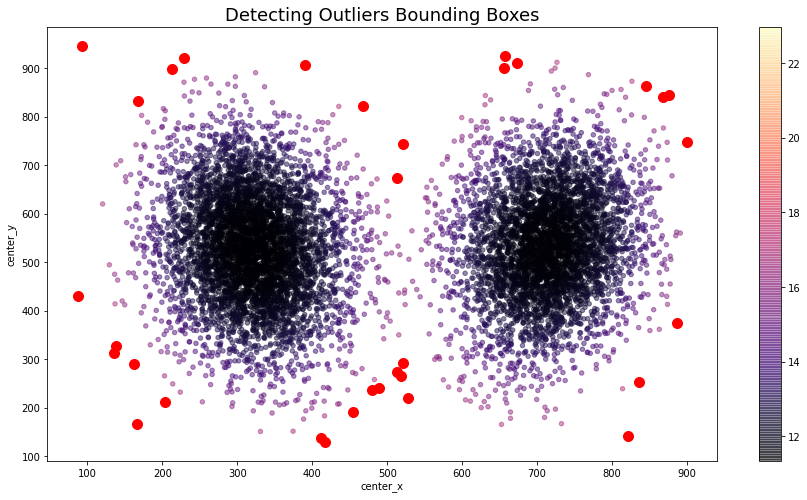

In [47]:
# GaussianMixture for clustering 
from sklearn.mixture import GaussianMixture
clf = GaussianMixture(n_components=2)
clf.fit(centers[['center_x', 'center_y']])
center_probs = clf.predict_proba(centers[['center_x', 'center_y']])
Z = -clf.score_samples(centers[['center_x', 'center_y']])
outliers = centers.iloc[Z > 17]
fig, ax = plt.subplots(figsize=(15,8))
centers.plot.scatter('center_x', 'center_y', c=Z, alpha=0.5, cmap='magma', ax=ax)
outliers.plot.scatter('center_x', 'center_y', c='red', marker='o', s=100, ax=ax)
_ = ax.set_title('Detecting Outliers Bounding Boxes', fontsize=18)

### Image Classification Models - VGG16, ResNet50

In [16]:
# reading train labels & removing duplicates
train_data = pd.read_csv('stage_2_train_labels.csv')
train_labels = train_data[['patientId','Target']].drop_duplicates()
train_labels.to_csv('train_labels.csv',index=False)

In [17]:
train_labels.head()

,patientId,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,0
4,00436515-870c-4b36-a041-de91049b9ab4,1


In [27]:
pneumonia_present = train_labels[train_labels['Target']==1]
pneumonia_absent = train_labels[train_labels['Target']==0]

In [32]:
pneumonia_present_list = pneumonia_present['patientId'].to_list()
pneumonia_absent_list = pneumonia_absent['patientId'].to_list()

In [35]:
for i in range(len(pneumonia_present_list)):
    pneumonia_present_list[i] = pneumonia_present_list[i] + '.dcm'
    
for i in range(len(pneumonia_absent_list)):
    pneumonia_absent_list[i] = pneumonia_absent_list[i] + '.dcm'

In [44]:
# Convert DICOM to PNG via openCV
import cv2
import os
import pydicom
import glob

inputdir = 'C:/Users/ashwathi.subramanian/Desktop/Capstone/stage_2_train_images/'
outdir = 'C:/Users/ashwathi.subramanian/Desktop/Capstone/stage_2_train_images_png/pneumonia_present/'
os.mkdir(outdir)

train_list = pneumonia_present_list
    
print("The number of training images found is:",len(train_list))

for f in train_list:   
    ds = pydicom.read_file(inputdir + f) # read dicom image
    img = ds.pixel_array # get image array
    cv2.imwrite(outdir + f.replace('.dcm','.png'),img) # write png image

The number of training images found is: 6012


In [45]:
# Convert DICOM to PNG via openCV
import cv2
import os
import pydicom
import glob

inputdir = 'C:/Users/ashwathi.subramanian/Desktop/Capstone/stage_2_train_images/'
outdir = 'C:/Users/ashwathi.subramanian/Desktop/Capstone/stage_2_train_images_png/pneumonia_absent/'
os.mkdir(outdir)

train_list = pneumonia_absent_list
    
print("The number of training images found is:",len(train_list))

for f in train_list:   
    ds = pydicom.read_file(inputdir + f) # read dicom image
    img = ds.pixel_array # get image array
    cv2.imwrite(outdir + f.replace('.dcm','.png'),img) # write png image

The number of training images found is: 20672


In [61]:
# Convert DICOM to PNG via openCV
import cv2
import os
import pydicom
import glob

inputdir = 'C:/Users/ashwathi.subramanian/Desktop/Capstone/stage_2_test_images/'
outdir = 'C:/Users/ashwathi.subramanian/Desktop/Capstone/stage_2_test_images_png/'
# os.mkdir(outdir)

test_list = glob.glob(inputdir+'*')
for i in range(len(test_list)):
    test_list[i] = test_list[i].split('\\')[1]
print("The number of training images found is:",len(test_list))

for f in test_list:   
    ds = pydicom.read_file(inputdir + f) # read dicom image
    img = ds.pixel_array # get image array
    cv2.imwrite(outdir + f.replace('.dcm','.png'),img) # write png image

The number of training images found is: 3000


In [96]:
# import the libraries as shown below

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [81]:
# re-size all the images to this
IMAGE_SIZE = [128, 128]

train_path = 'C:/Users/ashwathi.subramanian/Desktop/Capstone/stage_2_train_images_png/'
test_path = 'C:/Users/ashwathi.subramanian/Desktop/Capstone/stage_2_test_images_png/'

In [84]:
# useful for getting number of output classes
n_classes = 2

In [89]:
# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   validation_split=0.25)

In [90]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (128, 128),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                 subset='training')

Found 20013 images belonging to 2 classes.


In [91]:
validation_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (128, 128),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                 subset='validation')

Found 6671 images belonging to 2 classes.


In [97]:
# Here we will be using imagenet weights
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [99]:
x = Flatten()(resnet.output)
prediction = Dense(2, activation='softmax')(x)
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False
# create a model object
resnet50_model = Model(inputs=resnet.input, outputs=prediction)

resnet50_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [100]:
resnet50_model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [102]:
import time

StartTime = time.time()
r = resnet50_model.fit_generator(
  training_set,
  epochs=10,
  validation_data = validation_set,
  steps_per_epoch=len(training_set)
)
EndTime=time.time()
print("############### Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes #############')

Epoch 1/10
626/626 [==============================] - 3060s 5s/step - loss: 0.4945 - accuracy: 0.7731 - val_loss: 0.4622 - val_accuracy: 0.7763
Epoch 2/10
626/626 [==============================] - 2222s 4s/step - loss: 0.4713 - accuracy: 0.7802 - val_loss: 0.4903 - val_accuracy: 0.7754
Epoch 3/10
626/626 [==============================] - 1905s 3s/step - loss: 0.4648 - accuracy: 0.7813 - val_loss: 0.4397 - val_accuracy: 0.7990
Epoch 4/10
626/626 [==============================] - 1889s 3s/step - loss: 0.4659 - accuracy: 0.7800 - val_loss: 0.5162 - val_accuracy: 0.7760
Epoch 5/10
626/626 [==============================] - 1890s 3s/step - loss: 0.4596 - accuracy: 0.7848 - val_loss: 0.4412 - val_accuracy: 0.7933
Epoch 6/10
626/626 [==============================] - 2003s 3s/step - loss: 0.4614 - accuracy: 0.7865 - val_loss: 0.4380 - val_accuracy: 0.7964
Epoch 7/10
626/626 [==============================] - 1899s 3s/step - loss: 0.4569 - accuracy: 0.7886 - val_loss: 0.4562 - val_accuracy:

In [103]:
results = resnet50_model.evaluate(validation_set)
print('Validation accuracy using ResNet50 is : ', results[1]*100,'%')

209/209 [==============================] - 652s 3s/step - loss: 0.4351 - accuracy: 0.7993
Validation accuracy using ResNet50 is :  79.92804646492004 %


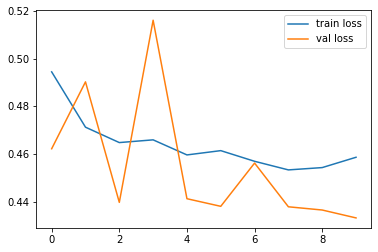

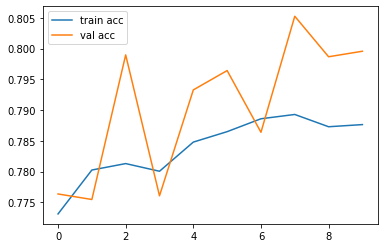

<Figure size 432x288 with 0 Axes>

In [104]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [106]:
# save it as a pickle file
from tensorflow.keras.models import load_model
resnet50_model.save('resnet50_model.pkl')

INFO:tensorflow:Assets written to: resnet50_model.pkl\assets


INFO:tensorflow:Assets written to: resnet50_model.pkl\assets


In [82]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [83]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [85]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)

In [86]:
prediction = Dense(n_classes, activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [87]:
# view the structure of the model
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0   

In [88]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [92]:
import time

StartTime = time.time()
r = model.fit_generator(
  training_set,
  epochs=5,
  validation_data = validation_set,
  steps_per_epoch=len(training_set)
)
EndTime=time.time()
print("############### Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes #############')

Epoch 1/5
626/626 [==============================] - 3120s 5s/step - loss: 0.4461 - accuracy: 0.7955 - val_loss: 0.4494 - val_accuracy: 0.8074
Epoch 2/5
626/626 [==============================] - 3579s 6s/step - loss: 0.4169 - accuracy: 0.8092 - val_loss: 0.4723 - val_accuracy: 0.7984
Epoch 3/5
626/626 [==============================] - 2488s 4s/step - loss: 0.4216 - accuracy: 0.8106 - val_loss: 0.4837 - val_accuracy: 0.7972
Epoch 4/5
626/626 [==============================] - 5115s 8s/step - loss: 0.4233 - accuracy: 0.8100 - val_loss: 0.4266 - val_accuracy: 0.8089
Epoch 5/5
626/626 [==============================] - 3287s 5s/step - loss: 0.4144 - accuracy: 0.8121 - val_loss: 0.4120 - val_accuracy: 0.8135
############### Total Time Taken:  293 Minutes #############


In [93]:
results = model.evaluate(validation_set)
print('Validation accuracy using VGG16 is : ', results[1]*100,'%')

209/209 [==============================] - 968s 5s/step - loss: 0.4144 - accuracy: 0.8084
Validation accuracy using VGG16 is :  80.84245324134827 %


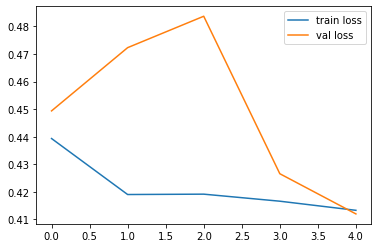

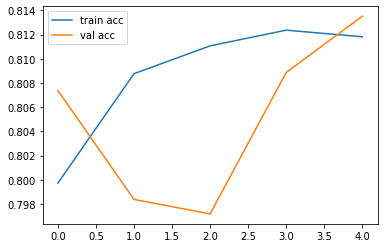

<Figure size 432x288 with 0 Axes>

In [94]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [95]:
# save it as a pickle file
from tensorflow.keras.models import load_model
model.save('VGG16_model.pkl')

INFO:tensorflow:Assets written to: VGG16_model.pkl\assets


INFO:tensorflow:Assets written to: VGG16_model.pkl\assets
